# ELEN E4903 Homework 2
## Kliment Mamykin UNI 2770

## Problem 1 a: Derive $\hat{\pi}$ for the prior

\begin{equation}
\newcommand\given[1][]{\,#1\vert\,}
\end{equation}

\begin{align}
\hat{\pi}_{ml} 
&= \arg \max_{\pi} \sum_{i=1}^{n} \ln p(y_i \given \pi) \\
&= \arg \max_{\pi} \sum_{i=1}^{n} \ln (\pi^{y_i} (1-\pi)^{1-y_i}) \\
&= \arg \max_{\pi} \sum_{i=1}^{n} y_i \ln \pi + (1-y_i) \ln (1-\pi) \\
&= \arg \max_{\pi} \sum_{i=1}^{n} y_i \ln \pi + \sum_{i=1}^{n} (1-y_i) \ln (1-\pi) \\
\end{align}

\begin{align} \big\Downarrow \end{align}

\begin{align}
0 &= \frac{d}{d\pi} \left( \sum_{i=1}^{n} y_i \ln \pi + \sum_{i=1}^{n} (1-y_i) \ln (1-\pi) \right) \Big|_{\hat{\pi}_{ml}} \\
&= \frac{\sum_{i=1}^{n} y_i}{\hat{\pi}_{ml}} - \frac{\sum_{i=1}^{n} (1−y_i)}{1 − \hat{\pi}_{ml}} \\
\end{align}

\begin{align} \big\Downarrow \end{align}

\begin{align}
\hat{\pi}_{ml} &= \frac{\sum_{i=1}^{n} y_i}{n} \\
\end{align}


## Problem 1 b: Derive $\hat{\theta}_{y}^{(1)}$ for Bernoulli features

Objective:

\begin{align}
\hat{\theta}_{y\,ml}^{(1)} 
&= \arg \max_{\theta_{y}^{(1)}} \sum_{i=1}^{n} \ln p(x_{i\,1} \given \theta_{y_i}^{(1)})
\quad
y \in \{0,1\}
\end{align}

To simplify notation lets temporarily disregard the dimention/feature index, and define $\hat{\theta}_{y\,ml} = \hat{\theta}_{y\,ml}^{(1)},\; \theta_{y}=\theta_{y}^{(1)}, \; x_{i}=x_{i\,1}$, and consider that $\hat{\theta}_{y\,ml}$ is a vector of length 2 for each value of $y$, containing class conditional parameters for a Beroulli :

\begin{align}
\begin{bmatrix}
  \hat{\theta}_{0\,ml} \\
  \hat{\theta}_{1\,ml} 
\end{bmatrix} = \begin{bmatrix}
  \arg \max_{\theta_{0}} \sum_{i=1}^{n} 1\!\!1(y_i=0) \ln p(x_{i} \given \theta_{0}) \\
  \arg \max_{\theta_{1}} \sum_{i=1}^{n} 1\!\!1(y_i=1) \ln p(x_{i} \given \theta_{1}) 
\end{bmatrix} = \begin{bmatrix}
  \frac{ \sum_{i=1}^{n} x_{i} 1\!\!1(y_i=0) }{ \sum_{i=1}^{n} 1\!\!1(y_i=0) } \\
  \frac{ \sum_{i=1}^{n} x_{i} 1\!\!1(y_i=1) }{ \sum_{i=1}^{n} 1\!\!1(y_i=1) }
\end{bmatrix}
\end{align}

Collapsing the 0 and 1 indices into $y$

\begin{align}
\hat{\theta}_{y\,ml} 
&= \frac{ \sum_{i=1}^{n} x_{i} 1\!\!1(y_i=y) }{ \sum_{i=1}^{n} 1\!\!1(y_i=y) }
\quad
y \in \{0,1\}
\end{align}

And bringing the original notation for the first dimension:

\begin{align}
\hat{\theta}_{y\,ml}^{(1)} 
&= \frac{ \sum_{i=1}^{n} x_{i\,1} 1\!\!1(y_i=y) }{ \sum_{i=1}^{n} 1\!\!1(y_i=y) }
\quad
y \in \{0,1\}
\end{align}


## Problem 1 c: Derive $\hat{\theta}_{y}^{(2)}$ for Pareto features

Objective:

\begin{align}
\hat{\theta}_{y\,ml}^{(2)} 
&= \arg \max_{\theta_{y}^{(2)}} \sum_{i=1}^{n} \ln p(x_{i\,2} \given \theta_{y_i}^{(2)})
\quad
p(x \given \theta) = \theta x^{-\theta+1}
\quad
y \in \{0,1\}
\end{align}

First we derive the maximum likelihood estimator for $\theta$ in a Pareto distributed sample.

Let $X = (x_0, x_1, \dotsc, x_n)$ be i.i.d. r.v. $X \sim Pareto(\theta) \Rightarrow p(x_i \given \theta) = \theta x_i^{-\theta+1}$

\begin{align}
L(\theta) &= p(X \given \theta) = \prod_{i=1}^{n} p(x_{i} \given \theta) \\
\ell(\theta) &= \ln L(\theta) = \sum_{i=1}^{n} \ln p(x_{i} \given \theta) \\
&= \sum_{i=1}^{n} \ln \theta x_i^{-\theta+1} \\
&= n \ln \theta - (\theta + 1) \sum_{i=1}^{n} \ln x_{i} \\
\frac{d \ell(\theta)}{d\theta} &= \frac{n}{\theta} - \sum_{i=1}^{n} \ln x_{i} = 0 \\
\hat{\theta}_{ml} &= \frac{n}{\sum_{i=1}^{n} \ln x_{i}}
\end{align}

Now back to class conditional probabilities:

\begin{align}
\hat{\theta}_{y\,ml}^{(2)} &= \arg \max_{\theta_{y}^{(2)}} \sum_{i=1}^{n} \ln p(x_{i\,2} \given \theta_{y_i}^{(2)}) \\
\hat{\theta}_{0\,ml}^{(2)}, \hat{\theta}_{1\,ml}^{(2)} &= \arg \max_{\theta_{0}^{(2)}, \theta_{1}^{(2)}} 
    \sum_{i=1}^{n} 1\!\!1(y_i=0) \ln p(x_{i\,2} \given \theta_{0}^{(2)}) +
    \sum_{i=1}^{n} 1\!\!1(y_i=1) \ln p(x_{i\,2} \given \theta_{1}^{(2)}) \\
&= \frac{\sum_{i=1}^{n} 1\!\!1(y_i=0)}{\sum_{i=1}^{n} 1\!\!1(y_i=0)\ln x_{i}}, 
   \frac{\sum_{i=1}^{n} 1\!\!1(y_i=1)}{\sum_{i=1}^{n} 1\!\!1(y_i=1)\ln x_{i}} \\
\hat{\theta}_{y\,ml}^{(2)} &= \frac{\sum_{i=1}^{n} 1\!\!1(y_i=y)}{\sum_{i=1}^{n} 1\!\!1(y_i=y)\ln x_{i}}
\end{align}


## Problem 2 a: Naive Bayes and confusion matrix

In [15]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
from hw2 import hw2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [16]:
hw2.problem_2_part_a()

,Predicted 0,Predicted 1
True 0,54,2
True 1,5,32


Accuracy: 92.47


## Problem 2 b: Bernoulli parameters visualization

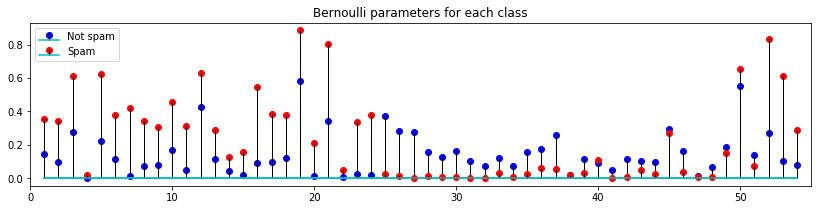

In [17]:
hw2.problem_2_part_b()

The dimention 16 represent the presence of the word "free" and dimension 52 represents the presence of a character "!". For both of these dimensions the parameters for the "spam" class are higher then the parameter for "not spam" class, hinting that the presence of these words/chars are more likely in "spam" emails. The value of the parameter represent relative frequency when this word appeared in "spam" vs "not spam" emails. Concretely, the word "free" appeared in about 60% of "spam" emails, and 10% of "not spam" emails. The "!" character appeared in ~85% of "spam" emails and ~25% of "not spam" emails.

## Problem 2 c: k-NN accuracy plot

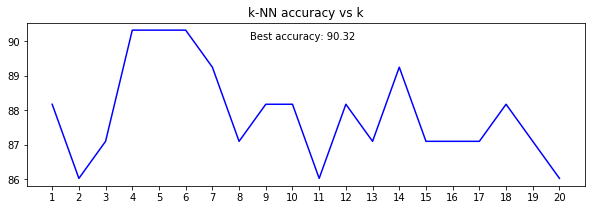

In [18]:
hw2.problem_2_part_c()

## Problem 2 d: Logistic Regression steepest ascend

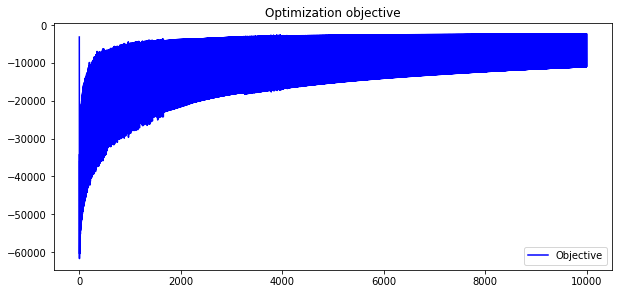

Test accuracy: 68.82


In [23]:
hw2.problem_2_part_d()

The objective function oscillates and is very noisy. So are the accuracies on training and test data (not shown). This  indicates a very narrow canyon in the surface of the objective function, and the learning is too large to "stop inside" of this canyon, it constantly overshoots a good location. This is probably caused by non-normalized features (e.g. Pareto features are much larger). However, the algorythm converges (just very slow). I ran it for 2e5 iterations and the objective still increases and the accuracies improve.

## Problem 2 e: Logistic Regression with Newton method

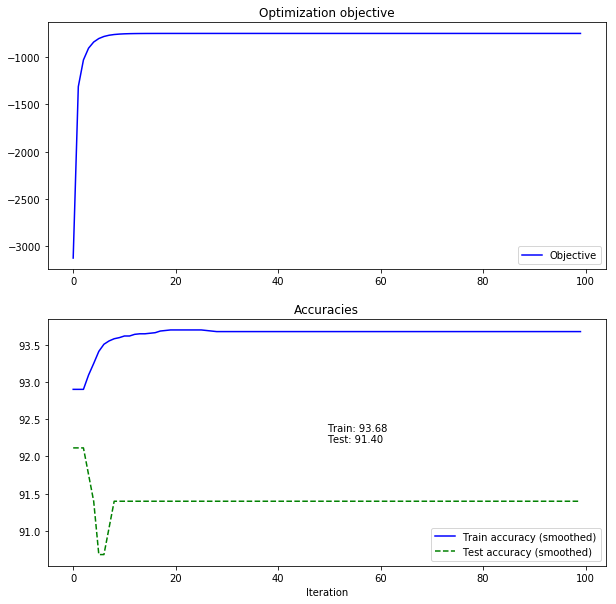

Test accuracy: 91.40


In [24]:
hw2.problem_2_part_e()